**Predicting Presence of Diabetes with Age, BMI, and Blood Sugar Level**

**Introduction:**


Diabetes is a chronic disease that affects the body's ability to turn food into energy. Normally after consumption, glucose is released into the bloodstream causing the pancreas to release insulin. This provides a signal so that our cells can utilize the newly acquired blood sugar for energy. Diabetics, however, are unable to produce insulin or cannot utilize it effectively, leading to major health problems. Unfortunately, many people suffer from this health problem.

This project aims to answer the question: can diabetes in an individual be predicted accurately using their age, BMI, and blood glucose level?

The diabetes prediction data set contains medical information about patients' diabetes status (positive or negative) and other pertinent health information. There are 9 columns (containing categorical and numerical data): age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, blood glucose level, and diabetes status. In total, there are 100,000 participants and thus 100,000 rows available. 

**Methods & Results**

In [1]:
#loading packages
library(tidyverse)
library(tidymodels)
library(dplyr)
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [8]:
#set seed, loading dataset, and splitting into train and test sets

set.seed(1)

url <- "https://raw.githubusercontent.com/danialtaj0/Dataset/main/diabetes_prediction_dataset.csv"
diabetes_data <- read_csv(url) |>
                 mutate(diabetes = as_factor(diabetes)) |> 
                rep_sample_n(10000)
diabetes_split <- initial_split(diabetes_data, prop = 0.75, strata = diabetes)
diabetes_train <- training(diabetes_split) 
diabetes_test <- testing(diabetes_split)
head(diabetes_train)

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


replicate,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,Female,18,0,0,never,20.11,5.0,100,0
1,Male,38,0,0,never,61.31,4.0,130,0
1,Male,38,0,0,not current,27.32,6.1,159,0
1,Male,35,0,0,current,23.44,4.5,200,0
1,Female,18,0,0,No Info,23.58,6.2,159,0
1,Female,44,0,0,never,27.54,5.0,145,0


In [9]:
class_distribution <- diabetes_train |>
  group_by(diabetes) |>
  summarise(Count = n())

class_distribution

predictor_means <- diabetes_train |>
  summarise(
    mean_bmi = mean(bmi, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE),
    mean_blood_glucose_level = mean(blood_glucose_level, na.rm = TRUE)
  )

predictor_means

# Filtering rows where there is missing data in any of the specified columns
rows_with_missing_data <- diabetes_train |>
  filter(is.na(bmi) | is.na(age) | is.na(blood_glucose_level) | is.na(diabetes))


print(rows_with_missing_data)

# Count the number of rows with missing data
num_rows_with_missing_data <- nrow(rows_with_missing_data)

# Print the count
missing_data <- tibble(n_rows_missing_data = num_rows_with_missing_data)
missing_data

diabetes,Count
<fct>,<int>
0,6866
1,634


replicate,mean_bmi,mean_age,mean_blood_glucose_level
<int>,<dbl>,<dbl>,<dbl>
1,27.27445,41.75922,138.3543


# A tibble: 0 × 10
# Groups:   replicate [0]
# ℹ 10 variables: replicate <int>, gender <chr>, age <dbl>, hypertension <dbl>,
#   heart_disease <dbl>, smoking_history <chr>, bmi <dbl>, HbA1c_level <dbl>,
#   blood_glucose_level <dbl>, diabetes <fct>


n_rows_missing_data
<int>
0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


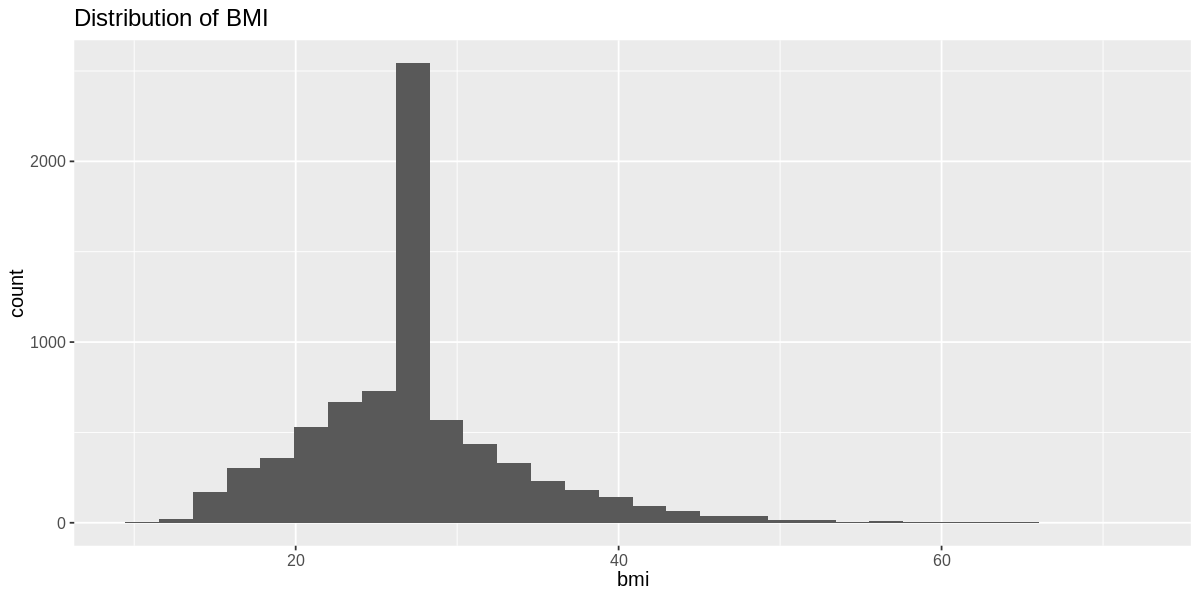

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


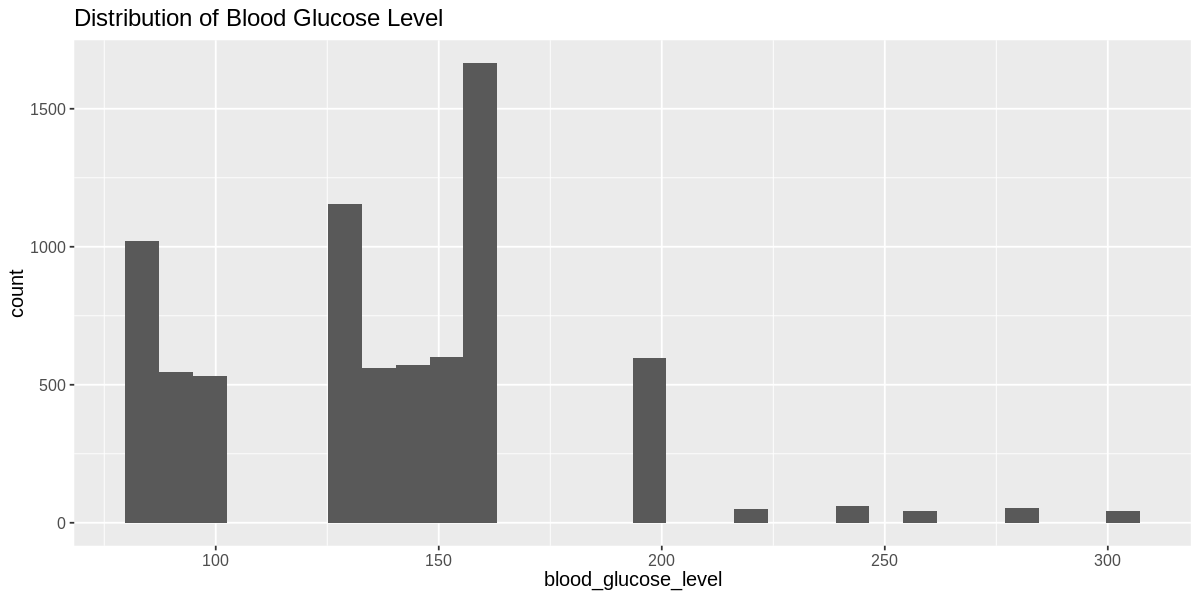

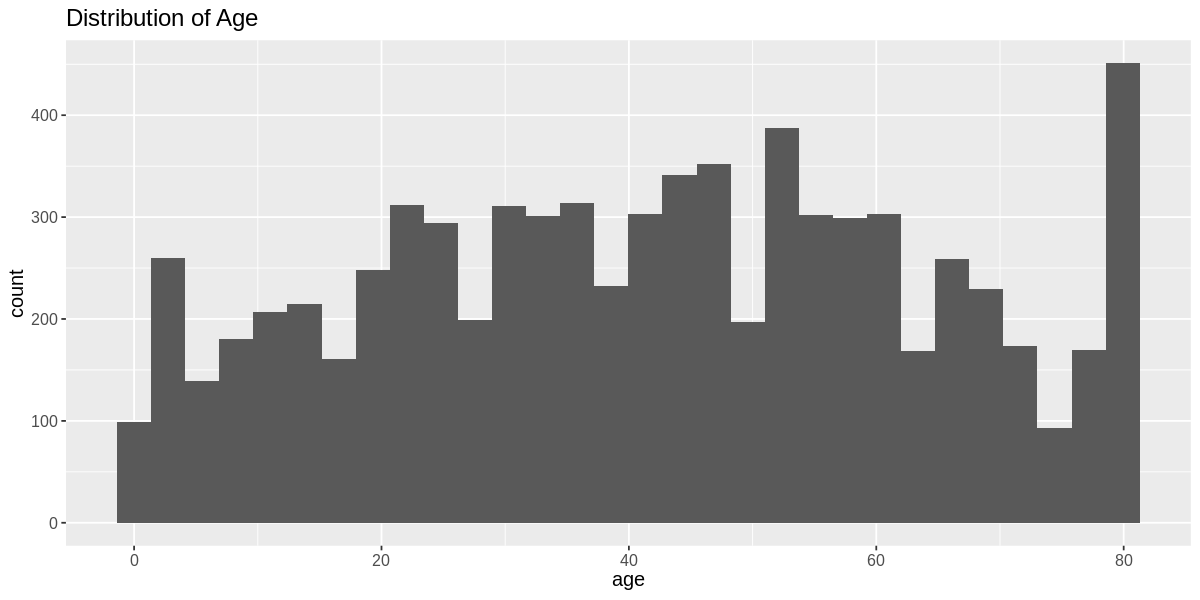

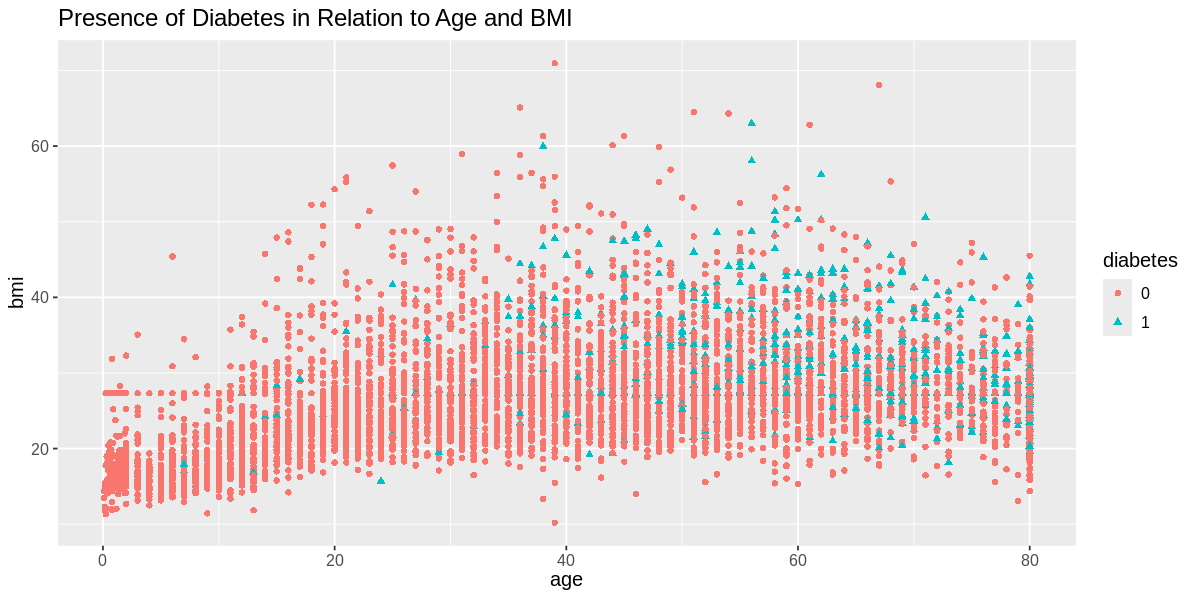

In [10]:
#making histograms and scatterplot
options(repr.plot.height = 5, repr.plot.width = 10)

bmi_dist <- ggplot(diabetes_train, aes(x = bmi)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of BMI") 

blood_glucose_dist <- ggplot(diabetes_train, aes(x = blood_glucose_level)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of Blood Glucose Level")

age_dist <- ggplot(diabetes_train, aes(x = age)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of Age")

age_bmi <- ggplot(diabetes_train, aes(x = age, y = bmi, color = diabetes, shape = diabetes)) + 
    geom_point() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Presence of Diabetes in Relation to Age and BMI")

bmi_dist
blood_glucose_dist
age_dist
age_bmi

In [14]:
#preforming cross validation to find the optimal k value
diabetes_recipe <- recipe(diabetes ~ bmi + age + blood_glucose_level, data = diabetes_train) |>
    step_scale(all_predictors()) |> 
    step_center(all_predictors()) |> 
    step_upsample(over_ratio = 1, skip = FALSE) 

diabetes_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification") 

diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = diabetes)
k_vals = tibble(neighbors = 5:15)

cv_results <- workflow() |> 
    add_model(diabetes_spec) |> 
    add_recipe(diabetes_recipe) |> 
    tune_grid(resamples = diabetes_vfold, grid = k_vals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy") |> 
    select(neighbors, mean) 
cv_results

# k = 11 or 12 

neighbors,mean
<int>,<dbl>
5,0.9416000
6,0.9413333
7,0.9445333
8,0.9445333
9,0.9445333
10,0.9445333
11,0.9464000
12,0.9464000
13,0.9461333


In [20]:
#knn model with k = 12
diabetes_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |> 
    set_engine("kknn") |> 
    set_mode("classification") 
#classification
diabetes_classifier <- workflow() |> 
    add_recipe(diabetes_recipe) |> 
    add_model(diabetes_spec) |> 
    fit(data = diabetes_train) 
prediction_metrics <- predict(diabetes_classifier, diabetes_test) |> 
    bind_cols(diabetes_test) |> 
    metrics(truth = diabetes, estimate = .pred_class) |> 
    filter(.metric == "accuracy") 
prediction_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9336


**Discussion**

**References**